https://www.coursera.org/learn/ml-regression/supplement/I0crX/optional-reading-worked-out-example-for-closed-form-solution

In [1]:
#%matplotlib inline
%matplotlib notebook
print "0000000000"


0000000000


In [2]:
X = [0,1,2,3,4]
Y = [1,3,7,13,21]
print X
print Y

[0, 1, 2, 3, 4]
[1, 3, 7, 13, 21]


In [3]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


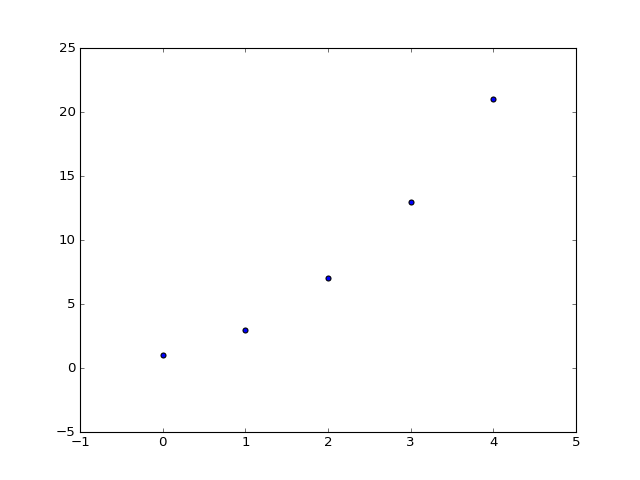

In [4]:
plt.scatter(X, Y)
#graphlab.canvas.set_target('ipynb')
plt.show()

In [5]:
numerator = 0
sumXY = 0
sumX = 0
sumY = 0
sumXX = 0
N = len(X)
for i in range(N):
    sumXY += X[i] * Y[i]
    sumX += X[i]
    sumY += Y[i]
    sumXX += X[i]*X[i]

print "N=", N, ", sumXY = ", sumXY, ", sumX = ", sumX, ", sumY = ", sumY, ", sumXX = ", sumXX
#numerator = (sum of X*Y) - (1/N)*((sum of X) * (sum of Y))
numerator = sumXY - (1./N)*(sumX*sumY)
#denominator = (sum of X^2) - (1/N)*((sum of X) * (sum of X))
denominator = sumXX - (1./N)*(sumX*sumX)

print type(numerator), "numerator = ", numerator
print type(denominator), "denominator = ", denominator
slope = numerator / denominator
print "slope = ", slope


N= 5 , sumXY =  140 , sumX =  10 , sumY =  45 , sumXX =  30
<type 'float'> numerator =  50.0
<type 'float'> denominator =  10.0
slope =  5.0


In [6]:
meanY = sumY*1./N
meanX = sumX*1./N
print "meanX = ", meanX
print "meanY = ", meanY
intercept = meanY - meanX*slope
print "intercept = ", intercept

meanX =  2.0
meanY =  9.0
intercept =  -1.0


http://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
Come back to this and use numpy + method shown to plot line

In [29]:
import graphlab
import pandas as pd
print "type(X) = ", type(X), ", X=", X
print "type(Y) = ", type(Y), ", Y=", Y
input_data = pd.DataFrame([X, Y])
print type(input_data)
print input_data
input_data = input_data.transpose()
print "-------------"
print input_data
input_data = graphlab.SFrame(input_data)
print type(input_data)
print input_data
print input_data.column_names
input_data.rename({'0': 'X', '1':'Y'})
print input_data


type(X) =  <type 'list'> , X= [0, 1, 2, 3, 4]
type(Y) =  <type 'list'> , Y= [1, 3, 7, 13, 21]
<class 'pandas.core.frame.DataFrame'>
   0  1  2   3   4
0  0  1  2   3   4
1  1  3  7  13  21
-------------
   0   1
0  0   1
1  1   3
2  2   7
3  3  13
4  4  21
<class 'graphlab.data_structures.sframe.SFrame'>
+---+----+
| 0 | 1  |
+---+----+
| 0 | 1  |
| 1 | 3  |
| 2 | 7  |
| 3 | 13 |
| 4 | 21 |
+---+----+
[5 rows x 2 columns]

<bound method SFrame.column_names of Columns:
	0	int
	1	int

Rows: 5

Data:
+---+----+
| 0 | 1  |
+---+----+
| 0 | 1  |
| 1 | 3  |
| 2 | 7  |
| 3 | 13 |
| 4 | 21 |
+---+----+
[5 rows x 2 columns]
>
+---+----+
| X | Y  |
+---+----+
| 0 | 1  |
| 1 | 3  |
| 2 | 7  |
| 3 | 13 |
| 4 | 21 |
+---+----+
[5 rows x 2 columns]



In [30]:
test_model = graphlab.linear_regression.create(input_data, target='Y', 
                                                features=['X'],
                                                validation_set=None,verbose=False)

In [31]:
print test_model.get('coefficients')

+-------------+-------+----------------+----------------+
|     name    | index |     value      |     stderr     |
+-------------+-------+----------------+----------------+
| (intercept) |  None | -0.93541977292 | 1.67394304051  |
|      X      |  None | 4.96770988646  | 0.683384384621 |
+-------------+-------+----------------+----------------+
[2 rows x 4 columns]

